In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/highest-ranked-universities-in-global-rankings/1000 highest ranked universities in global rankings.csv


In [24]:
df = pd.read_csv("/kaggle/input/highest-ranked-universities-in-global-rankings/1000 highest ranked universities in global rankings.csv", index_col=False)
df.head()

,Unnamed: 0,University,Country,THE 2022,QS 2023,ARWU 2021,USNWR 2022,Average,Ranking based on the average
0,0,Harvard University,United States,2,5,1,1.0,2.3,1.0
1,1,Massachusetts Institute of Technology (MIT),United States,5,1,4,2.0,3,2.0
2,2,Stanford University,United States,4,3,2,3.0,3,3.0
3,3,University of Oxford,United Kingdom,1,4,7,5.0,4.3,4.0
4,4,University of Cambridge,United Kingdom,5,2,3,8.0,4.5,5.0


In [25]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,University,Country,THE 2022,QS 2023,ARWU 2021,USNWR 2022,Average,Ranking based on the average
0,Harvard University,United States,2,5,1,1.0,2.3,1.0
1,Massachusetts Institute of Technology (MIT),United States,5,1,4,2.0,3,2.0
2,Stanford University,United States,4,3,2,3.0,3,3.0
3,University of Oxford,United Kingdom,1,4,7,5.0,4.3,4.0
4,University of Cambridge,United Kingdom,5,2,3,8.0,4.5,5.0


In [29]:
df.isnull().count()

University                      1187
Country                         1187
THE 2022                        1187
QS 2023                         1187
ARWU 2021                       1187
USNWR 2022                      1187
Average                         1187
Ranking based on the average    1187
dtype: int64

In [33]:
df = df.drop(['THE 2022','QS 2023','ARWU 2021','USNWR 2022'],axis=1)
df.head()

,University,Country,Average,Ranking based on the average
0,Harvard University,United States,2.3,1.0
1,Massachusetts Institute of Technology (MIT),United States,3,2.0
2,Stanford University,United States,3,3.0
3,University of Oxford,United Kingdom,4.3,4.0
4,University of Cambridge,United Kingdom,4.5,5.0


In [37]:
df.isna().sum()

University                        0
Country                           0
Average                         943
Ranking based on the average    929
dtype: int64

In [38]:
df = df.dropna()

In [39]:
df.head()

,University,Country,Average,Ranking based on the average
0,Harvard University,United States,2.3,1.0
1,Massachusetts Institute of Technology (MIT),United States,3,2.0
2,Stanford University,United States,3,3.0
3,University of Oxford,United Kingdom,4.3,4.0
4,University of Cambridge,United Kingdom,4.5,5.0


In [40]:
df.isna().sum()

University                      0
Country                         0
Average                         0
Ranking based on the average    0
dtype: int64

In [42]:
df2 = df.iloc[0:51]
df2.head()

,University,Country,Average,Ranking based on the average
0,Harvard University,United States,2.3,1.0
1,Massachusetts Institute of Technology (MIT),United States,3,2.0
2,Stanford University,United States,3,3.0
3,University of Oxford,United Kingdom,4.3,4.0
4,University of Cambridge,United Kingdom,4.5,5.0


[Text(0.5, 1.0, 'Countries with universities in Top 50')]

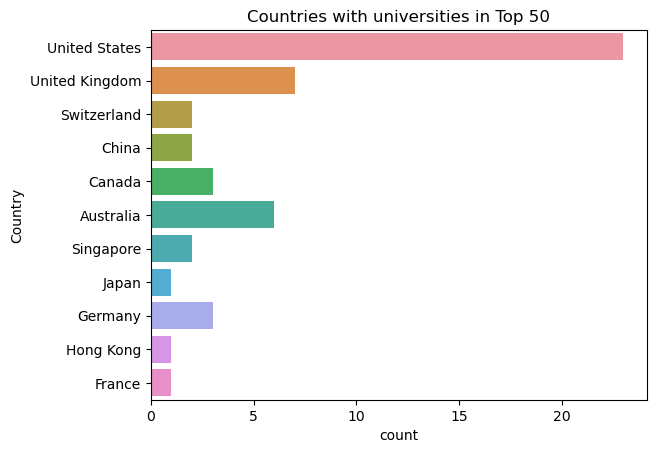

In [57]:
sns.countplot(y=df2["Country"]).set(title='Countries with universities in Top 50')

In [68]:
values = df2['Country'].value_counts().keys().tolist()
counts = df2['Country'].value_counts().tolist()

In [76]:
dict = {'Country':values, 'Count':counts}
df3 = pd.DataFrame(dict)
df3.head()

,Country,Count
0,United States,23
1,United Kingdom,7
2,Australia,6
3,Canada,3
4,Germany,3


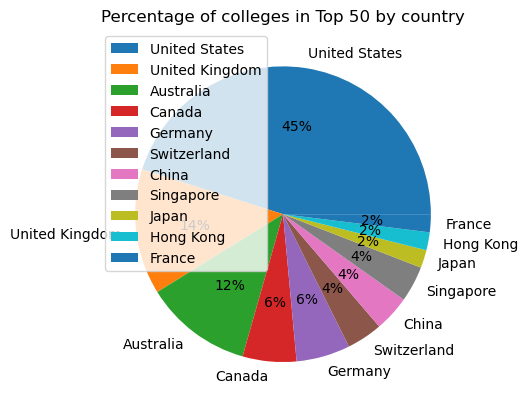

In [84]:
plt.title("Percentage of colleges in Top 50 by country")
plt.pie(counts, labels=values, autopct='%.0f%%')
plt.legend()
plt.show()